<a href="https://colab.research.google.com/github/igor531205/neural_network/blob/main/lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLPClassifier многослойный перцептрон (MLP).

## Задача. Обучите Neural Network MLPClassifier от sklearn.

### Разведочный анализ данных - Exploratory Data Analysis (EDA)

*Скачиваем* [Dry_Bean_Dataset.csv](https://www.kaggle.com/datasets/josegarban/beans-classification/)

Attribute Information:

1.   Area (**A**): площадь зоны компонента и количество пикселей в ее границах;
2.   Perimeter (**P**): окружность зерна определяется как длина его границы;
3.   Major axis length (**L**): расстояние между концами самой длинной линии, которую можно нарисовать из компонента;
4.   Minor axis length (**l**): самая длинная линия, которую можно провести от боба, стоя перпендикулярно главной оси;
5.   Aspect ratio (**K**): определяет соотношение между L и l;
6.   Eccentricity (**Ec**): эксцентриситет эллипса с теми же моментами, что и область;
7.   Convex area (**C**): количество пикселей в самом маленьком выпуклом многоугольнике, который может содержать площадь семени боба;
8.   Equivalent diameter (**Ed**): диаметр круга, имеющего ту же площадь, что и площадь семян фасоли;
9.   Extent (**Ex**): отношение пикселей в ограничительной рамке к области компонента;
10.   Solidity (**S**): также известна как выпуклость - соотношение пикселей в выпуклой оболочке с пикселями, находящимися в бобах;
11.   Roundness (**R**): вычисляется по следующей формуле (4piA)/(P^2);
12.   Compactness (**CO**): измеряет округлость объекта (Ed/L);
13.   ShapeFactor1 (**SF1**): фактор формы;
14.   ShapeFactor2 (**SF2**): фактор формы;
15.   ShapeFactor3 (**SF3**): фактор формы;
16.   ShapeFactor4 (**SF4**): фактор формы;
17.   Class: (**Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira**).

In [1]:
from google.colab import files

link = 'dry_bean.csv' # переименованный Dry_Bean_Dataset.csv
uploaded = files.upload_file(link) # Загружаем файл Dry_Bean_Dataset.csv

Saved dry_bean.csv to /content/dry_bean.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn

# для работы с графиками в интерактивном режиме
%matplotlib inline

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

# отключаем предупреждения
warn.filterwarnings('ignore')

In [3]:
df=pd.read_csv(link, index_col=False) # Считываем данные

pd.options.display.max_columns = None # Отключаем ограничение в отображении столбцов

df.head(n=5) # Выводим 5 строк

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610291.00,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638018.00,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.11,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645884.00,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620134.00,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
df.columns # Выведем все столбцы

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [5]:
df.shape # Размеры таблицы: (кол-во строк, кол-во столбцов)

(13611, 17)

In [6]:
df.describe() # Основная информация по количественным признакам

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,1.361100e+04,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,7.729110e+05,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,3.238848e+05,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,5.536000e+02,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,6.769955e+05,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,7.722730e+05,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,9.555000e+05,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1.921685e+06,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


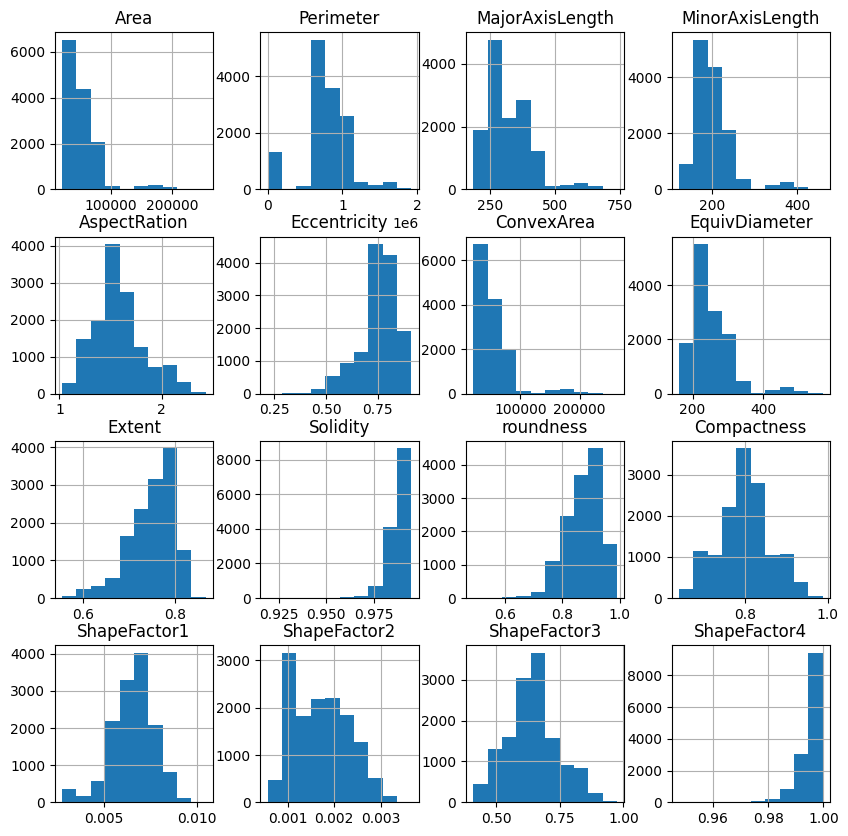

In [7]:
df.hist(figsize=(10, 10)); # Графическое отображение количественных признаков

In [8]:
df.info() # Тип признаков и количество значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [9]:
df.nunique() # Проверяем количество уникальных значений

Area               12011
Perimeter          13351
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13526
roundness          13543
Compactness        13543
ShapeFactor1       13543
ShapeFactor2       13543
ShapeFactor3       13543
ShapeFactor4       13543
Class                  7
dtype: int64

In [10]:
df.isnull().sum() # Проверяем общее количество пропущенных значений

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [11]:
print(df['Class'].unique()) # Проверяем уникальные значения Class

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


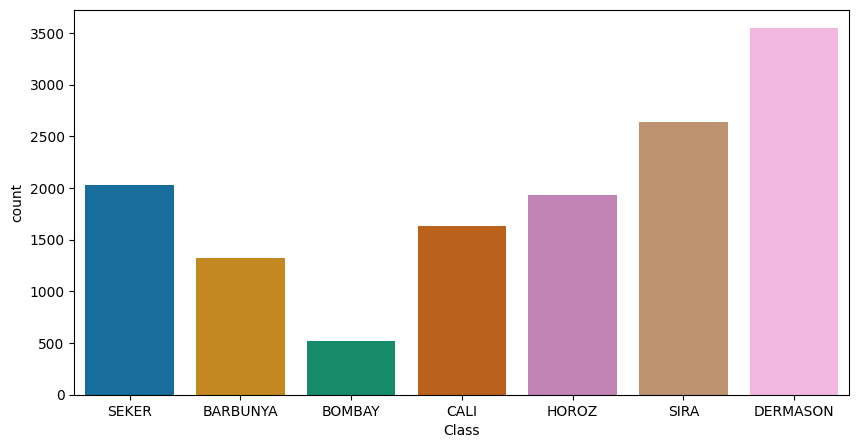

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Class', palette='colorblind')
plt.show()

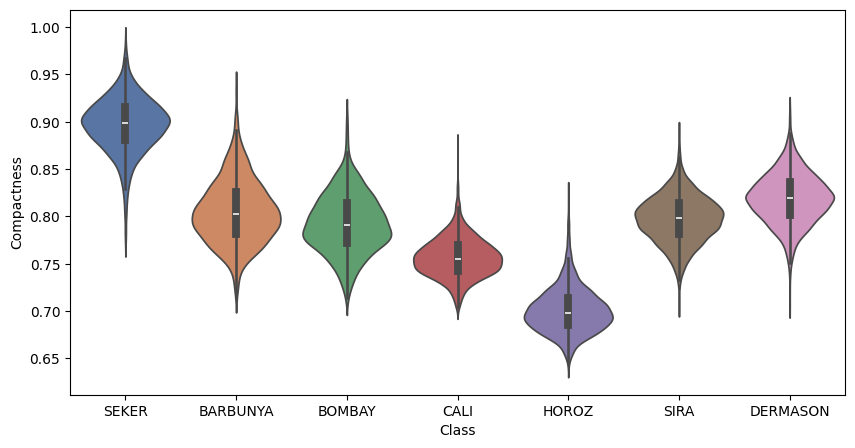

In [13]:
plt.figure(figsize=(10,5))
sns.violinplot(x=df.Class, y=df.Compactness, palette='deep')
plt.show()

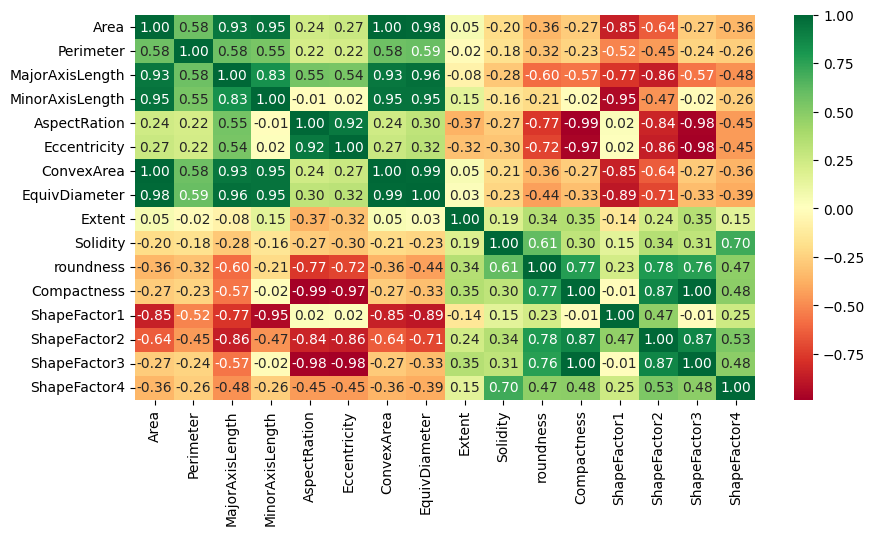

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', fmt='.2f') # Корреляция признаков
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

### Обучение Neural Network MLPClassifier

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [16]:
# Кодирование категориальной переменной 'Class'
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

# Сохраняем названия классов для будущего использования
class_labels = label_encoder.classes_
class_labels

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

In [17]:
# Разделяем данные на признаки и целевую переменную
X = df.drop('Class', axis=1)
y = df['Class']

# Масштабирование числовых признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Выводим первый результатат масштабирования
X_scaled[0]

array([-0.84074853, -0.50211057, -1.30659814, -0.63115304, -1.56505251,
       -2.18572039, -0.84145059, -1.0633406 ,  0.28908744,  0.36761343,
        1.42386707,  1.8391164 ,  0.68078638,  2.40217287,  1.92572347,
        0.83837103])

In [18]:
# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# Определение сетки гиперпараметров для поиска
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(MLPClassifier(max_iter=300, random_state=42), param_grid, n_jobs=-1, cv=3, scoring='accuracy')

# Запуск поиска гиперпараметров
grid_search.fit(X_train, y_train)

# Получение лучших параметров и точности
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Выводим лучшие параметры и точность
best_params, best_score

({'activation': 'relu', 'hidden_layer_sizes': (50,), 'solver': 'adam'},
 0.9336884463766401)

In [20]:
# Обучение MLPClassifier с лучшими гиперпараметрами
best_mlp = MLPClassifier(**best_params, max_iter=300, random_state=42)
best_mlp.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = best_mlp.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)

# Выводим точность
accuracy

0.9338964377524789